In [2]:
import pandas as pd

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_analysis_adv-main/datasets/product_inspection/product_inspection.csv')
df.head()

,date,inspection_step,value,upper_spec,target,lower_spec
0,2022-01-01,A,21.2,22.0,21.3,20.6
1,2022-01-02,A,21.7,22.0,21.3,20.6
2,2022-01-03,A,21.4,22.0,21.3,20.6
3,2022-01-04,A,21.5,22.0,21.3,20.6
4,2022-01-05,A,21.5,22.0,21.3,20.6


### 데이터 표준화 하기

In [8]:
### 'inspection_step' 그룹별 value 평균 구하기
# df.groupby('inspection_step')['value'].mean()


### 그룹별 value 값 표준화 하기
df['normalized1'] = df.groupby('inspection_step')['value'].transform(lambda x: (x-x.mean())/x.std())
df['normalized1']

### 구간 정해서 히스토그램 그려보기

,normalized1
0,-0.366795
1,1.561575
2,0.404553
3,0.790227
4,0.790227
...,...
424,1.356267
425,-1.502891
426,0.800320
427,0.482636


### 표준화 한 데이터 히스토그램으로 그리기

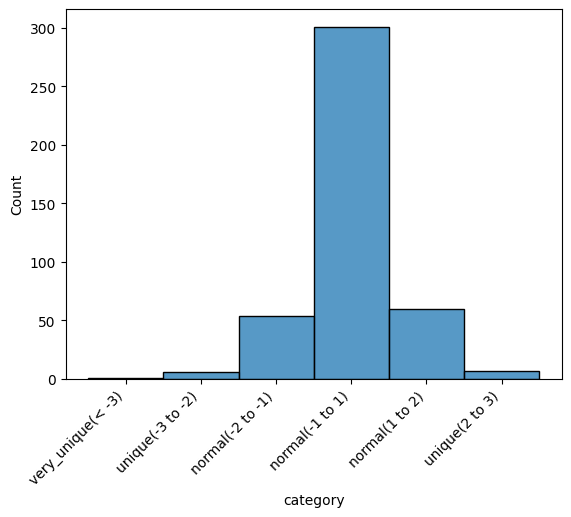

In [13]:
import numpy as np

### 구간 및 레이블 정의
  # 구간과 레이블 개수는 정확히 일치해야 한다.

bins = [-np.inf, -3, -2, -1, 1, 2, 3, np.inf]
labels = [
    'very_unique(< -3)', 'unique(-3 to -2)', 'normal(-2 to -1)', 'normal(-1 to 1)', 'normal(1 to 2)', 'unique(2 to 3)', 'very_unique(> 3)'
]

### 표준화 데이터 구간별로 나누고 레이블 달기
df['category'] = pd.cut(df['normalized1'], bins=bins, labels=labels)
df.head()

import matplotlib.pyplot as plt
import seaborn as sns

### 히스토그램 그리기
fig, ax = plt.subplots()
# x축에는 표준화 데이터가 있는 칼럼명 입력
sns.histplot(df, x='category', ax=ax)
# 'ha'는 'horizontal alignment'의 약자
plt.xticks(rotation=45, ha='right')
plt.show()

### 5% 특별한 값이 어떤 건지 확인해 보기

In [17]:
# unique 데이터만 필터링 해서 확인
unique_data = df[df['category'].isin(['unique(-3 to -2)', 'unique(2 to 3)'])]
unique_data

# very_unique 데이터 확인 및 출력
very_unique_data = df[df['category'].isin(['very_unique(< -3)', 'very_unique(> 3)'])]
very_unique_data

,date,inspection_step,value,upper_spec,target,lower_spec,normalized1,category
104,2022-04-15,A,20.5,22.0,21.3,20.6,-3.066513,very_unique(< -3)
